In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape) 
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

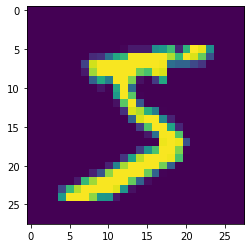

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10 
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = Sequential() 
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.2158 - accuracy: 0.9505 - val_loss: 0.0876 - val_accuracy: 0.9744
Epoch 2/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0690 - accuracy: 0.9781 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0459 - accuracy: 0.9852 - val_loss: 0.0885 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.1008 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.1148 - val_accuracy: 0.9750


In [15]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.11480660736560822, 0.9750000238418579]


In [16]:
prediction=model.predict(X_test[:4])
print(prediction)

[[1.9785584e-09 1.4297676e-18 3.3058487e-09 4.4471822e-09 5.5951701e-17
  1.0780670e-13 8.5914675e-20 1.0000000e+00 6.7543708e-09 1.0589081e-10]
 [2.6194826e-08 2.6868276e-09 9.9999297e-01 5.7803312e-13 3.7644264e-13
  3.0356340e-16 7.0766991e-06 3.6745794e-21 4.9882326e-10 7.4996860e-18]
 [4.7325949e-10 9.9999714e-01 4.6270947e-09 1.6963414e-15 8.8497961e-07
  3.4165204e-09 5.2614531e-11 5.0443572e-07 1.5648858e-06 1.3390378e-11]
 [1.0000000e+00 3.1068283e-22 2.7347206e-11 1.0989917e-18 1.0615758e-13
  2.8711653e-15 2.8159385e-11 7.2715895e-14 2.2277669e-13 3.0045029e-09]]


In [17]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\n7568\Desktop\Project\models\mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img = Image.open('data/' + str(index) + '.png').convert("L")
    img = img.resize((28,28))
    im2arr = np.array(img) 
    im2arr = im2arr.reshape(1,28,28,1)
   
    y_pred = model.predict(im2arr)
  
    print(y_pred)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [25]:
model.save('models/mnistCNN.h5')